Link to article:  https://www.mostlypython.com/p/was-this-october-really-warmer-than?publication_id=1261763&post_id=138819986&triggerShare=true&isFreemail=false&r=2teif


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('../data/raw/climate_data_84062.csv')
raw_data.head()

/var/folders/gg/0m4l7pvs5zq9d8p4tzflypdc0000gn/T/ipykernel_70982/3588134.py:1: DtypeWarning: Columns (9,13,21,29,31,35,41,43,45,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../data/raw/climate_data_84062.csv')


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,DASF,DASF_ATTRIBUTES,...,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT14,WT14_ATTRIBUTES
0,US1UTUT0022,"PLEASANT GROVE 1.0 WNW, UT US",40.378274,-111.748849,1406.7,2011-04-21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1UTUT0022,"PLEASANT GROVE 1.0 WNW, UT US",40.378274,-111.748849,1406.7,2011-04-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1UTUT0022,"PLEASANT GROVE 1.0 WNW, UT US",40.378274,-111.748849,1406.7,2011-04-23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1UTUT0022,"PLEASANT GROVE 1.0 WNW, UT US",40.378274,-111.748849,1406.7,2011-04-24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1UTUT0022,"PLEASANT GROVE 1.0 WNW, UT US",40.378274,-111.748849,1406.7,2011-04-25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def show_df(df_):
    display(df_.shape)
    display(df_.columns)
    display(df_.isna().sum())
    display(df_.info())
    display(df_.head())
    return df_

cleaned_data = (raw_data
                .dropna(axis=1, how="all")
                .assign(DATE = lambda df_: pd.to_datetime(df_['DATE']))
                [['DATE','PRCP','SNOW','SNWD','TMIN','TMAX']]
                .sort_values('DATE')
                .query('~TMAX.isna()')
                .set_index('DATE')
                .reset_index()
                .pipe(show_df)
                )

(35868, 6)

Index(['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMIN', 'TMAX'], dtype='object')

DATE       0
PRCP    8987
SNOW    9281
SNWD    9781
TMIN      46
TMAX       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35868 entries, 0 to 35867
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    35868 non-null  datetime64[ns]
 1   PRCP    26881 non-null  float64       
 2   SNOW    26587 non-null  float64       
 3   SNWD    26087 non-null  float64       
 4   TMIN    35822 non-null  float64       
 5   TMAX    35868 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.6 MB


None

,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1947-10-11,0.67,0.0,NaN,44.0,57.0
1,1947-10-12,0.00,0.0,NaN,36.0,68.0
2,1947-10-13,0.03,0.0,NaN,46.0,73.0
3,1947-10-14,0.00,0.0,NaN,42.0,67.0
4,1947-10-15,0.00,0.0,NaN,38.0,65.0


In [24]:
cleaned_data.query('~TMIN.isna()')

,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1947-10-11,0.67,0.0,NaN,44.0,57.0
1,1947-10-12,0.00,0.0,NaN,36.0,68.0
2,1947-10-13,0.03,0.0,NaN,46.0,73.0
3,1947-10-14,0.00,0.0,NaN,42.0,67.0
4,1947-10-15,0.00,0.0,NaN,38.0,65.0
...,...,...,...,...,...,...
35863,2023-11-15,NaN,NaN,NaN,46.0,65.0
35864,2023-11-16,NaN,NaN,NaN,44.0,59.0
35865,2023-11-17,NaN,NaN,NaN,42.0,61.0
35866,2023-11-18,NaN,NaN,NaN,44.0,51.0


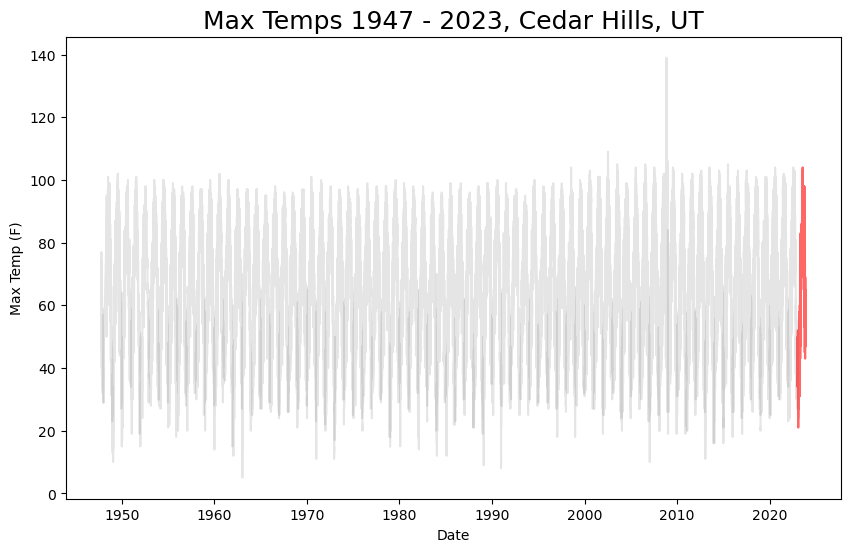

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
title = "Max Temps 1947 - 2023, Cedar Hills, UT"
ax.set_title(title, fontsize=18)
ax.set_xlabel("Date")
ax.set_ylabel("Max Temp (F)")

for year in range(1947, 2024):
    df_current_year = cleaned_data[cleaned_data['DATE'].dt.year == year]
    dates = df_current_year['DATE']
    days = df_current_year['DATE'].dt.day
    highs = df_current_year['TMAX']
    if year == 2023:
        ax.plot(dates, highs, color='red', alpha = 0.6)
    else:
        ax.plot(dates, highs, color='gray', alpha = 0.2)